<a href="https://colab.research.google.com/github/sahithya17b/Air-Quality/blob/main/categorical_to_numeric_and_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-662155604.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


✅ Cleaned dataset saved as 'cleaned_dataset.csv'


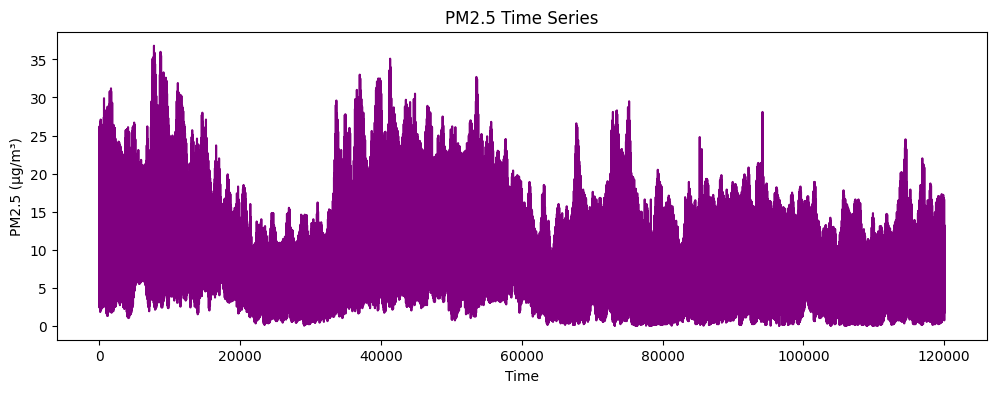

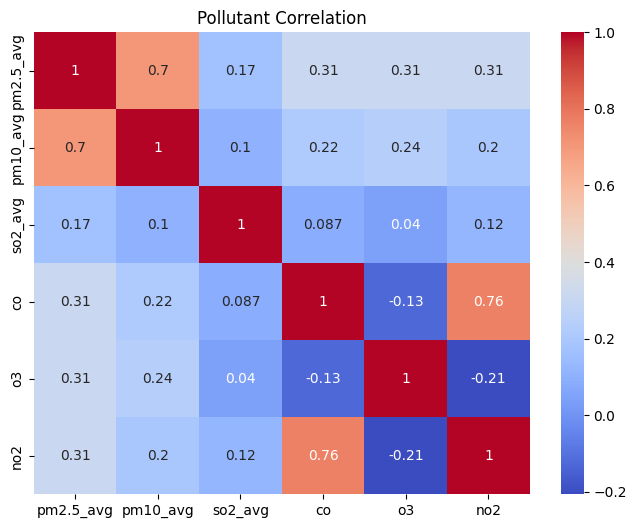

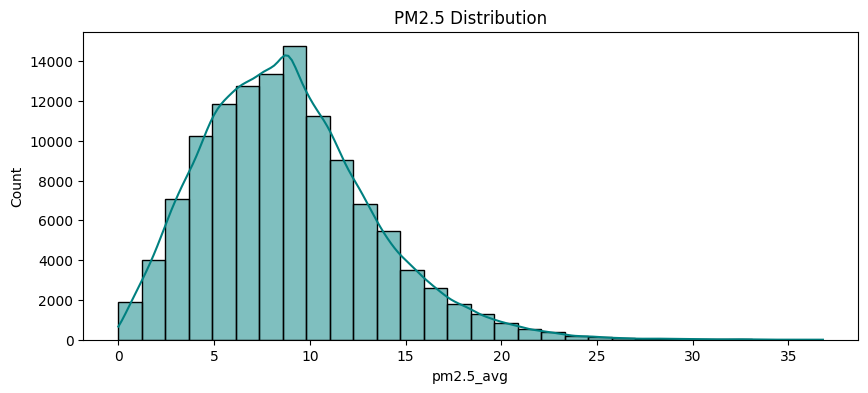

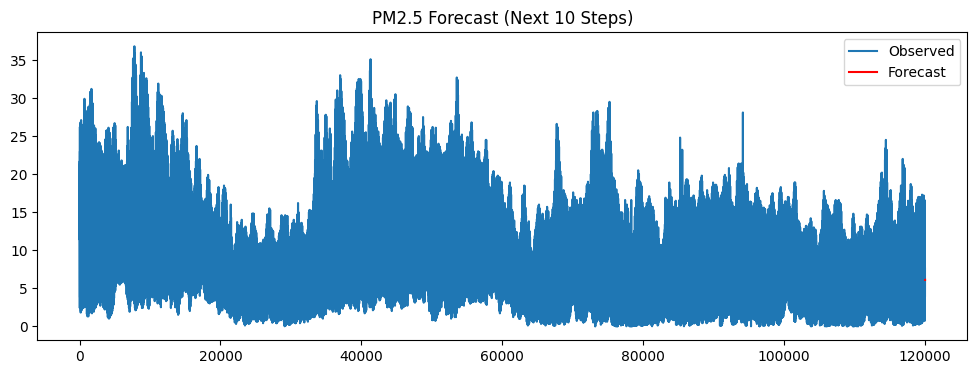

Forecast Accuracy → MAE: 2.52, RMSE: 3.34
Current AQI: 27.0
Current PM2.5: 6.0 μg/m³


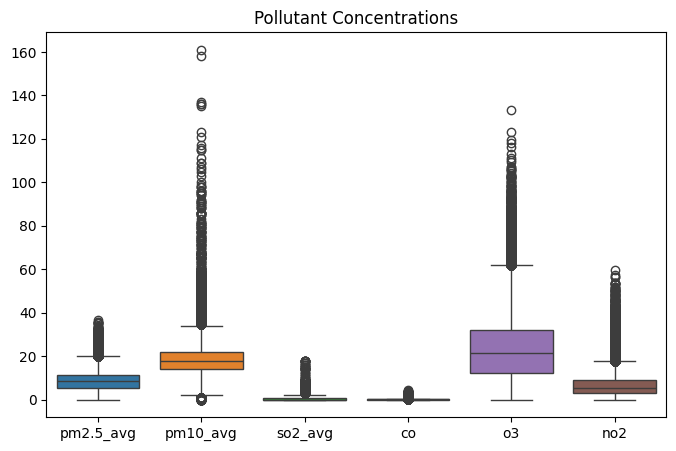

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
# -------------------------------
# LOAD AND CLEAN DATA
# -------------------------------
path = "/air quality original.csv"  # 🔹 change this to your file path
df = pd.read_csv(path, low_memory=False)

# Drop duplicates & fully empty rows, replace empty strings
df = df.drop_duplicates().dropna(how='all').replace(r'^\s*$', pd.NA, regex=True)

# Convert numeric columns and fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Save cleaned dataset (optional)
df.to_csv("cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_dataset.csv'")

# -------------------------------
# VISUALIZATIONS
# -------------------------------

# Ensure a time index exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
else:
    df.index = pd.RangeIndex(len(df))

# 1️⃣ PM2.5 Time Series
plt.figure(figsize=(12,4))
plt.plot(df.index, df['pm2.5_avg'], color='purple')
plt.title("PM2.5 Time Series")
plt.xlabel("Time"); plt.ylabel("PM2.5 (μg/m³)")
plt.show()

# 2️⃣ Pollutant Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df[['pm2.5_avg','pm10_avg','so2_avg','co','o3','no2']].corr(), annot=True, cmap='coolwarm')
plt.title("Pollutant Correlation")
plt.show()

# 3️⃣ PM2.5 Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['pm2.5_avg'], bins=30, kde=True, color='teal')
plt.title("PM2.5 Distribution")
plt.show()

# 4️⃣ PM2.5 Forecast (ARIMA)
pm_series = df['pm2.5_avg']
model = ARIMA(pm_series, order=(1,1,1))
fit = model.fit()
forecast = fit.forecast(steps=10)
plt.figure(figsize=(12,4))
plt.plot(pm_series, label='Observed')
plt.plot(range(len(pm_series), len(pm_series)+10), forecast, label='Forecast', color='red')
plt.title("PM2.5 Forecast (Next 10 Steps)"); plt.legend()
plt.show()

# 5️⃣ Forecast Accuracy
pred_in_sample = fit.predict(start=1, end=len(pm_series)-1)
mae = mean_absolute_error(pm_series[1:], pred_in_sample)
rmse = np.sqrt(mean_squared_error(pm_series[1:], pred_in_sample))
print(f"Forecast Accuracy → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 6️⃣ Current Air Quality
print(f"Current AQI: {df['aqi'].iloc[-1]}")
print(f"Current PM2.5: {df['pm2.5_avg'].iloc[-1]} μg/m³")

# 7️⃣ Pollutant Concentrations (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['pm2.5_avg','pm10_avg','so2_avg','co','o3','no2']])
plt.title("Pollutant Concentrations")
plt.show()
